# CNN Model for Music Emotion Classification

I've implemented a 1D CNN to classify emotions from music features.

🔹 Key Features:

*   Conv1D layers: Extract temporal patterns from features.
*   Batch Normalization & Dropout: Prevent overfitting.
*   Softmax output: Multi-class emotion classification.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, Flatten, BatchNormalization, MaxPooling1D, Flatten, Dense, Bidirectional, Attention, GlobalAveragePooling1D
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Load dataset
file_path = "Acoustic Features.csv"
df = pd.read_csv(file_path)

In [ ]:
# Separate features and labels
X = df.drop(columns=["Class"]).values
y = df["Class"].values

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Standardize features/Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape for CNN input (CNN expects 3D: samples, time steps, features)
X = np.expand_dims(X, axis=2)

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# Get number of classes
num_classes = len(np.unique(y))
num_classes

4

# Simple CNN Model

* 3* Conv 1D + Flatten 128
* kernel_size=3,
* activation='relu'
* Dropout(0.3)
* epochs=100, batch_size=32


In [ ]:
# Build CNN model
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)),
    BatchNormalization(),
    Dropout(0.3),

    Conv1D(128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Conv1D(256, kernel_size=3, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y)), activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n🎯 Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 19s 801ms/step - accuracy: 0.4592 - loss: 1.8160 - val_accuracy: 0.6917 - val_loss: 1.2206
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7861 - loss: 0.8700 - val_accuracy: 0.6417 - val_loss: 1.2058
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8723 - loss: 0.3857 - val_accuracy: 0.6000 - val_loss: 1.1498
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9483 - loss: 0.1513 - val_accuracy: 0.5250 - val_loss: 1.1700
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9448 - loss: 0.1785 - val_accuracy: 0.4500 - val_loss: 1.2733
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9484 - loss: 0.1284 - val_accuracy: 0.4500 - val_loss: 1.3215
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9301 - loss: 0.2102 - val_accuracy: 0.5250 - val_loss: 1.3017
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9797 - loss: 0.1037 - val_accuracy: 0.4667 - val_los

we have a little bit overfitting

Text(0.5, 1.0, 'Model Loss')

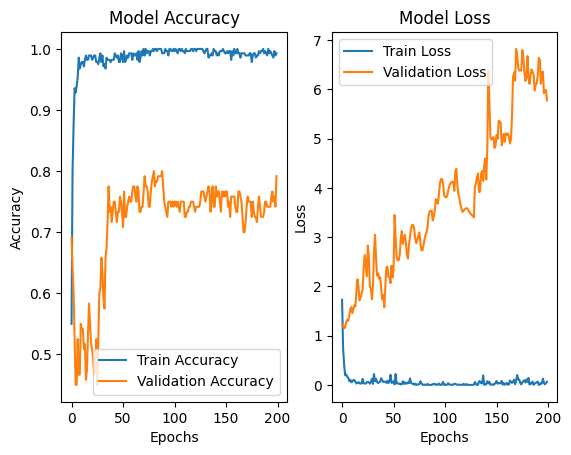

In [ ]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

# Improvement 1 : Increase Dropout

* 3* Conv 1D + Flatten 128
* kernel_size=3,
* activation='relu'
* Dropout(0.4) &  Dropout(0.5)
* epochs=100, batch_size=32

In [ ]:
# Build CNN model
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)),
    BatchNormalization(),
    Dropout(0.4),

    Conv1D(128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Conv1D(256, kernel_size=3, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y)), activation='softmax')
])

In [ ]:
# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n🎯 Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 561ms/step - accuracy: 0.4039 - loss: 2.2141 - val_accuracy: 0.5000 - val_loss: 1.2852
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7195 - loss: 1.1088 - val_accuracy: 0.3583 - val_loss: 1.2916
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8078 - loss: 0.7233 - val_accuracy: 0.3500 - val_loss: 1.3092
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8279 - loss: 0.6402 - val_accuracy: 0.3750 - val_loss: 1.3553
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8225 - loss: 0.4518 - val_accuracy: 0.4083 - val_loss: 1.3965
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8889 - loss: 0.4862 - val_accuracy: 0.3917 - val_loss: 1.3668
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8553 - loss: 0.5546 - val_accuracy: 0.3750 - val_loss: 1.2916
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8930 - loss: 0.2642 - val_accuracy: 0.3000 - val_los

Text(0.5, 1.0, 'Model Loss')

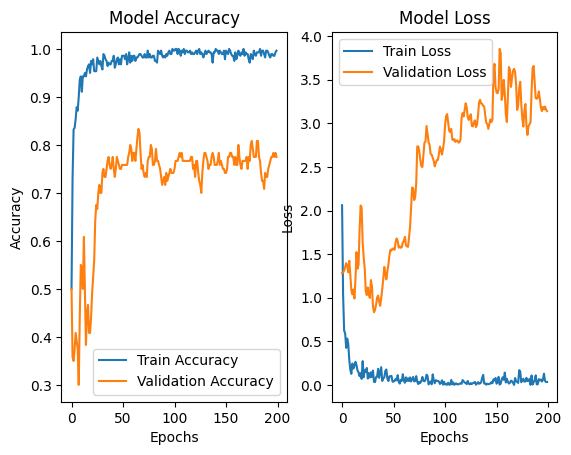

In [ ]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

# Improvement 2 : Improved CNN Model with Early Stopping, Dropout, and Regularization with 1024 conv1D

* 3*conv 1D (256-1024) + Dense(512)
* dropout 0.4 & 0.5
* epochs=100, batch_size=32

In [ ]:
# Build Optimized CNN Model with Regularization, Dropout & Early Stopping
model = Sequential([
    Conv1D(256, kernel_size=3, activation='relu', padding="same", input_shape=(X.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.4),  # Increased dropout

    Conv1D(512, kernel_size=3, activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.4),  # Increased dropout

    Conv1D(1024, kernel_size=3, activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.4),  # Increased dropout

    GlobalAveragePooling1D(),  # Helps prevent overfitting

    Dense(512, activation='relu', kernel_regularizer='l2'),  # L2 regularization
    Dropout(0.5),  # More dropout for better generalization
    Dense(num_classes, activation='softmax')
])

In [ ]:

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-5),  # Lower learning rate for stability
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Set up EarlyStopping to stop training if validation loss does not improve
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train Model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 758ms/step - accuracy: 0.1854 - loss: 8.7407 - val_accuracy: 0.2583 - val_loss: 8.1980
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.1764 - loss: 8.6694 - val_accuracy: 0.2500 - val_loss: 8.1950
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2885 - loss: 8.4292 - val_accuracy: 0.2500 - val_loss: 8.1929
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3150 - loss: 8.4825 - val_accuracy: 0.2500 - val_loss: 8.1916
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3639 - loss: 8.3285 - val_accuracy: 0.2500 - val_loss: 8.1915
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2735 - loss: 8.3773 - val_accuracy: 0.2500 - val_loss: 8.1919
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3099 - loss: 8.4206 - val_accuracy: 0.2500 - val_loss: 8.1932
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3044 - loss: 8.4136 - val_accuracy: 0.2500 - val_los

In [ ]:

# Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n🎯 Optimized CNN Test Accuracy: {test_acc * 100:.2f}%")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5435 - loss: 7.0539 

🎯 Optimized CNN Test Accuracy: 57.50%


Text(0.5, 1.0, 'Model Loss')

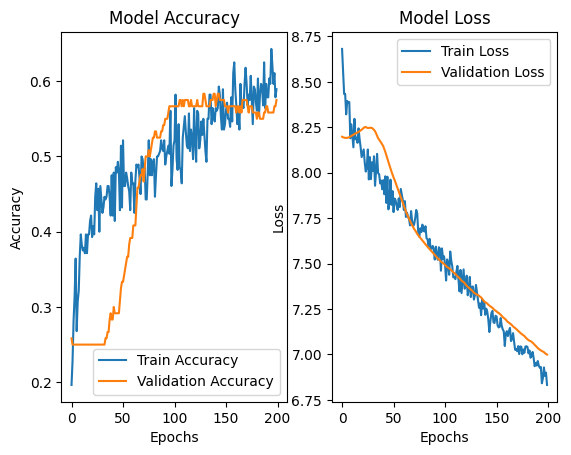

In [ ]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

# with 1024 filters

* 1024 Filters → Extracts the richest features
* Deep Network (More Layers) → Learns complex emotional patterns
* Batch Normalization → Faster convergence
* MaxPooling → Retains essential features, removes noise
* Global Average Pooling → Prevents overfitting vs. Flatten
* Lower Learning Rate (1e-5) → Avoids instability

In [ ]:
model = Sequential([

    Conv1D(256, kernel_size=3, activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(512, kernel_size=3, activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.4),

    Conv1D(1024, kernel_size=3, activation='relu', padding="same"),  # 🔥 1024 Filters
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.4),

    GlobalAveragePooling1D(),  # Helps prevent overfitting


    Dense(512, activation='relu'),
    Dropout(0.5),  # More dropout for regularization
    Dense(num_classes, activation='softmax')
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-5),  # Lower LR for stable learning
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Train Model
cnn_1024_history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

# Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n🎯 Supercharged CNN Test Accuracy: {test_acc * 100:.2f}%")

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 689ms/step - accuracy: 0.2463 - loss: 1.7825 - val_accuracy: 0.1833 - val_loss: 1.3882
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3317 - loss: 1.5971 - val_accuracy: 0.2333 - val_loss: 1.3865
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3407 - loss: 1.6767 - val_accuracy: 0.2750 - val_loss: 1.3852
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3041 - loss: 1.6210 - val_accuracy: 0.2333 - val_loss: 1.3849
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3634 - loss: 1.5739 - val_accuracy: 0.2333 - val_loss: 1.3861
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3460 - loss: 1.4860 - val_accuracy: 0.2500 - val_loss: 1.3895
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3603 - loss: 1.5913 - val_accuracy: 0.2500 - val_loss: 1.3953
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3600 - loss: 1.5170 - val_accuracy: 0.2500 - val_los

Text(0.5, 1.0, 'Model Loss')

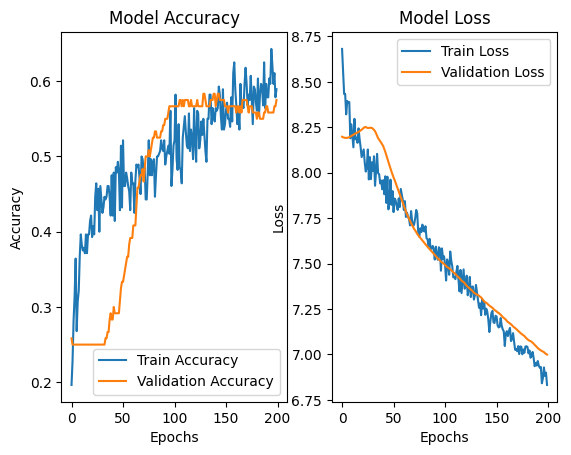

In [ ]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

In [ ]:
# Build Optimized CNN Model with More Dropout
model = Sequential([
    Conv1D(256, kernel_size=3, activation='relu', padding="same", input_shape=(X.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.4),  # Increased dropout

    Conv1D(512, kernel_size=3, activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.4),  # Increased dropout

    Conv1D(1024, kernel_size=3, activation='relu', padding="same"),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.4),  # Increased dropout

    GlobalAveragePooling1D(),  # Helps prevent overfitting

    Dense(512, activation='relu'),
    Dropout(0.5),  # More dropout for better generalization
    Dense(num_classes, activation='softmax')
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-5),  # Lower LR for stability
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Train Model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 314ms/step - accuracy: 0.2207 - loss: 1.8097 - val_accuracy: 0.2500 - val_loss: 1.3886
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.3055 - loss: 1.7158 - val_accuracy: 0.2500 - val_loss: 1.4047
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2992 - loss: 1.6982 - val_accuracy: 0.2500 - val_loss: 1.4283
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2852 - loss: 1.7718 - val_accuracy: 0.2500 - val_loss: 1.4568
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2814 - loss: 1.7072 - val_accuracy: 0.2500 - val_loss: 1.4858
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3723 - loss: 1.6172 - val_accuracy: 0.2500 - val_loss: 1.5139
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3659 - loss: 1.5844 - val_accuracy: 0.2500 - val_loss: 1.5384
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3396 - loss: 1.4547 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n🎯 Test Accuracy: {test_acc * 100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.4958 - loss: 1.2198

🎯 Test Accuracy: 50.00%


Text(0.5, 1.0, 'Model Loss')

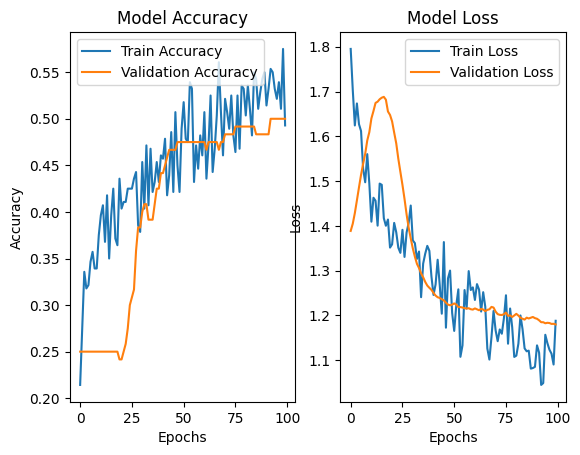

In [ ]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

# Long Short-Term Memory (LSTM) model

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
file_path = "Acoustic Features.csv"
df = pd.read_csv(file_path)

# Extract features & labels
X = df.drop(columns=["Class"]).values  # Features
y = df["Class"].values  # Target labels

# Encode class labels to numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Convert labels to numbers

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape for LSTM input (LSTM expects 3D: samples, time steps, features)
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))  # (num_samples, time_step=1, num_features)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Build the LSTM Model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(1, X_train.shape[2])),
    Dropout(0.3),
    LSTM(128),
    Dropout(0.5),
    Dense(128, activation="relu"),
    Dense(num_classes, activation="softmax")  # Output layer
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.3649 - loss: 1.3786 - val_accuracy: 0.5000 - val_loss: 1.3617
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4775 - loss: 1.3520 - val_accuracy: 0.5375 - val_loss: 1.3201
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5915 - loss: 1.2969 - val_accuracy: 0.5375 - val_loss: 1.2326
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5958 - loss: 1.1760 - val_accuracy: 0.5250 - val_loss: 1.0873
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5991 - loss: 1.0242 - val_accuracy: 0.5750 - val_loss: 0.9481
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6552 - loss: 0.8699 - val_accuracy: 0.6375 - val_loss: 0.8220
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7371 - loss: 0.6738 - val_accuracy: 0.6750 - val_loss: 0.7289
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7891 - loss: 0.5389 - val_accuracy: 0.

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n🎯 Test Accuracy: {test_acc * 100:.2f}%")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7000 - loss: 2.5538

🎯 Test Accuracy: 71.25%


Text(0.5, 1.0, 'Model Loss')

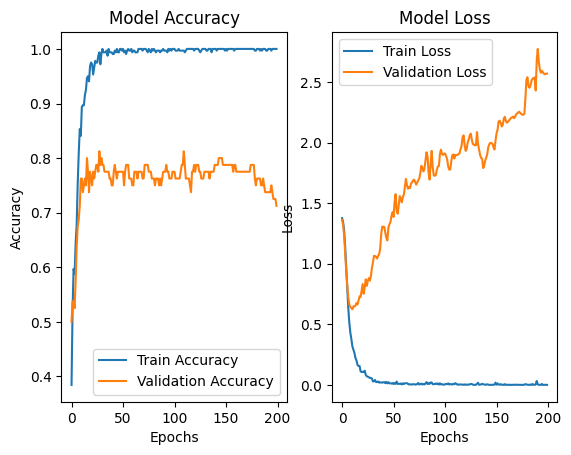

In [ ]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

# Improved LSTM Model with These Adjustments

* Increase LSTM Units:

  * The model might need more memory to capture long-range dependencies in the data.Try increasing the number of LSTM units (e.g., 256, 512) to allow the model to capture more complex patterns.

* Add More LSTM Layers:

  * A deeper network might help capture more sophisticated patterns in the audio data. We can try adding another LSTM layer.

* Use Bidirectional LSTM:

  * A Bidirectional LSTM helps the model learn dependencies in both forward and backward directions, which is useful for time-series or sequential data like music.

* Tune Dropout:
  * Increase Dropout rates to prevent overfitting. This forces the model to learn more general features.

* Use Batch Normalization:

  * Adding Batch Normalization can speed up training and help with stability.

* Regularization:

  * Add L2 regularization to LSTM layers to prevent the model from memorizing specific patterns too closely.

* Learning Rate Scheduling:

  * Use learning rate annealing (or scheduling) to adjust the learning rate during training for better convergence.

In [ ]:
from tensorflow.keras.regularizers import l2

# Build Improved LSTM Model
model = Sequential([
    Bidirectional(LSTM(256, return_sequences=True, input_shape=(1, X_train.shape[2]), kernel_regularizer=l2(0.01))),
    Dropout(0.4),
    LSTM(512, kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    BatchNormalization(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")  # Output layer
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=1e-4),  # Smaller learning rate for stability
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Train Model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

# Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n🎯 Improved LSTM Test Accuracy: {test_acc * 100:.2f}%")


Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.2610 - loss: 11.6560 - val_accuracy: 0.5875 - val_loss: 11.0817
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3851 - loss: 10.9837 - val_accuracy: 0.6875 - val_loss: 10.7042
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4639 - loss: 10.4205 - val_accuracy: 0.7125 - val_loss: 10.3415
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5535 - loss: 9.9704 - val_accuracy: 0.7250 - val_loss: 9.9931
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5660 - loss: 9.5318 - val_accuracy: 0.7000 - val_loss: 9.6593
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6361 - loss: 9.0781 - val_accuracy: 0.6875 - val_loss: 9.3405
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6678 - loss: 8.7836 - val_accuracy: 0.7000 - val_loss: 9.0366
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6961 - loss: 8.3776 - val_accura

Text(0.5, 1.0, 'Model Loss')

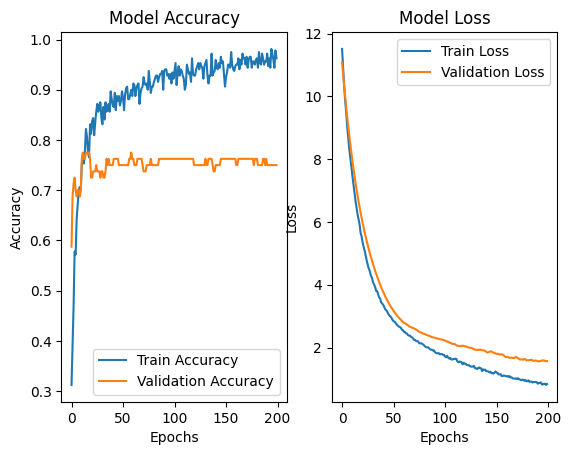

In [ ]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

# Hybrid CNN-LSTM Model for Music Emotion Classification

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPooling1D, LSTM, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
file_path = "Acoustic Features.csv"
df = pd.read_csv(file_path)

# Extract features & labels
X = df.drop(columns=["Class"]).values  # Features
y = df["Class"].values  # Target labels

# Encode class labels to numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Convert labels to numbers

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape for CNN-LSTM input (LSTM expects 3D: samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # (num_samples, num_features, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Build the CNN-LSTM Model
model = Sequential([
    # CNN Feature Extraction
    Conv1D(32, kernel_size=3, activation="relu", input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(64, kernel_size=3, activation="relu", input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(128, kernel_size=3, activation="relu"),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    # LSTM for Temporal Features
    LSTM(128, return_sequences=False),
    Dropout(0.5),

    # Fully Connected Layers
    Dense(128, activation="relu"),
    Dense(num_classes, activation="softmax")  # Output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [ ]:

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.3913 - loss: 1.3167 - val_accuracy: 0.2625 - val_loss: 1.3618
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5881 - loss: 1.0382 - val_accuracy: 0.3875 - val_loss: 1.3389
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7126 - loss: 0.8429 - val_accuracy: 0.4625 - val_loss: 1.3358
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6962 - loss: 0.7001 - val_accuracy: 0.4375 - val_loss: 1.3422
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8410 - loss: 0.4740 - val_accuracy: 0.4750 - val_loss: 1.3386
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9344 - loss: 0.2719 - val_accuracy: 0.3375 - val_loss: 1.3329
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9512 - loss: 0.1848 - val_accuracy: 0.4000 - val_loss: 1.3309
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9922 - loss: 0.0796 - val_accuracy: 0.

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n🎯 Test Accuracy: {test_acc * 100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7320 - loss: 1.7766

🎯 Test Accuracy: 73.75%


Text(0.5, 1.0, 'Model Loss')

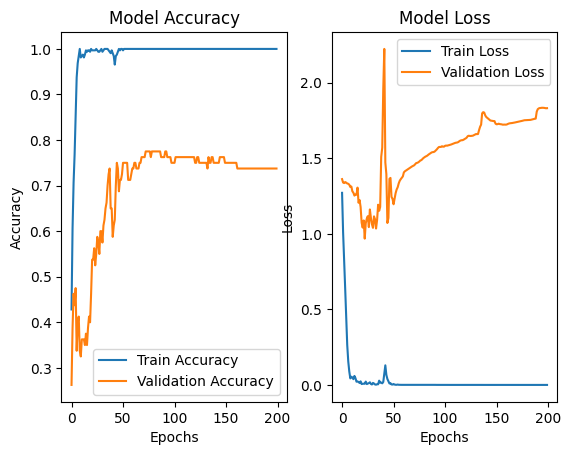

In [ ]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

# Transformer Model for Music Emotion Classification

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
file_path = "Acoustic Features.csv"
df = pd.read_csv(file_path)

# Extract features & labels
X = df.drop(columns=["Class"]).values  # Features
y = df["Class"].values  # Target labels

# Encode class labels to numeric values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Convert labels to numbers

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape for Transformer input (transformers expect 3D input: batch, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # (num_samples, num_features, 1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Get number of classes
num_classes = len(np.unique(y))

In [ ]:
# Define Transformer Encoder Block
def transformer_encoder(inputs, num_heads=4, ff_dim=128, dropout_rate=0.1):
    """Transformer encoder block with multi-head self-attention and feedforward layers"""
    x = LayerNormalization()(inputs)
    x = MultiHeadAttention(num_heads=num_heads, key_dim=ff_dim)(x, x)
    x = Dropout(dropout_rate)(x)
    res = x + inputs  # Residual connection

    x = LayerNormalization()(res)
    x = Dense(ff_dim, activation="relu")(x)
    x = Dropout(dropout_rate)(x)
    x = Dense(inputs.shape[-1], activation="relu")(x)  # Ensure same shape
    return x + res  # Residual connection


In [ ]:
# Define the Transformer Model
input_layer = Input(shape=(X_train.shape[1], 1))
x = transformer_encoder(input_layer, num_heads=4, ff_dim=128)
x = transformer_encoder(x, num_heads=4, ff_dim=128)

x = GlobalAveragePooling1D()(x)  # Pooling to reduce dimensions
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
output_layer = Dense(num_classes, activation="softmax")(x)

In [ ]:
# Create model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n🎯 Test Accuracy: {test_acc * 100:.2f}%")


Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 331ms/step - accuracy: 0.2411 - loss: 1.3876 - val_accuracy: 0.4250 - val_loss: 1.3749
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3474 - loss: 1.3725 - val_accuracy: 0.4125 - val_loss: 1.3649
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3391 - loss: 1.3643 - val_accuracy: 0.3375 - val_loss: 1.3559
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3459 - loss: 1.3592 - val_accuracy: 0.3625 - val_loss: 1.3486
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3468 - loss: 1.3512 - val_accuracy: 0.3875 - val_loss: 1.3422
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4094 - loss: 1.3391 - val_accuracy: 0.4125 - val_loss: 1.3355
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4150 - loss: 1.3318 - val_accuracy: 0.4000 - val_loss: 1.3300
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3696 - loss: 1.3350 - val_accuracy: 

Text(0.5, 1.0, 'Model Loss')

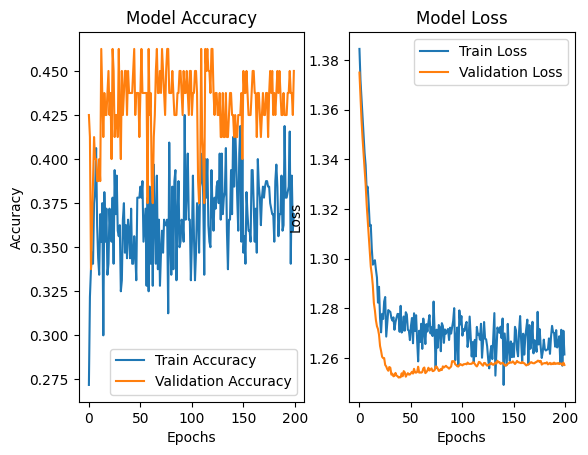

In [ ]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

# Optimized CNN-LSTM Hybrid Model with Attention

In [ ]:
# Load Dataset
file_path = "Acoustic Features.csv"
df = pd.read_csv(file_path)

# Preprocess Labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["Class"])
num_classes = len(label_encoder.classes_)

# Extract Features
X = df.drop(columns=["Class"]).values
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # (samples, timesteps, features)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# CNN-LSTM Model with Attention
input_layer = Input(shape=(X_train.shape[1], 1))

# CNN Feature Extraction
x = Conv1D(128, kernel_size=3, activation="relu", padding="same")(input_layer)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2)(x)

x = Conv1D(256, kernel_size=3, activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2)(x)

In [ ]:

# Bidirectional LSTM for better context understanding
x = Bidirectional(LSTM(128, return_sequences=True))(x)

# Attention Mechanism
attention = Attention()([x, x])
x = Flatten()(attention)

# Fully Connected Layers
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
output_layer = Dense(num_classes, activation="softmax")(x)

In [ ]:

# Define Model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile Model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train Model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

# Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n🎯 Test Accuracy: {test_acc * 100:.2f}%")


Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.4561 - loss: 1.1704 - val_accuracy: 0.2625 - val_loss: 1.3462
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7423 - loss: 0.6667 - val_accuracy: 0.4375 - val_loss: 1.3241
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8268 - loss: 0.4128 - val_accuracy: 0.4250 - val_loss: 1.3471
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9279 - loss: 0.2203 - val_accuracy: 0.4125 - val_loss: 1.4056
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9694 - loss: 0.1396 - val_accuracy: 0.4500 - val_loss: 1.4814
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9584 - loss: 0.1137 - val_accuracy: 0.3000 - val_loss: 1.5958
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9916 - loss: 0.0581 - val_accuracy: 0.3750 - val_loss: 1.5967
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9973 - loss: 0.0251 - val_accuracy: 0.

Text(0.5, 1.0, 'Model Loss')

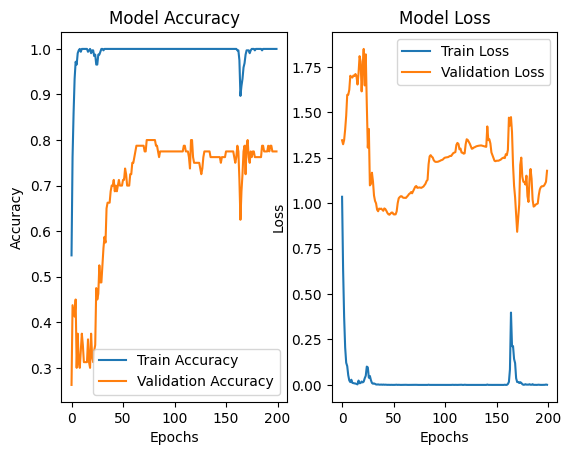

In [ ]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')